In [ ]:
pip install meteostat pandas

In [ ]:
from datetime import datetime
import meteostat as mt
import pandas as pd

In [ ]:
start = datetime(1990, 1, 1)
end = datetime(2025, 8, 1)

In [ ]:
location_id = '45007'  # Replace XYZ123 with the desired weather station ID

In [ ]:
data = mt.Daily(45007, start, end)
data = data.fetch()

df = pd.DataFrame(data)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
print(df)

            tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
time                                                                    
1990-01-01  16.8  15.0  18.0  <NA>  <NA>  <NA>  14.0  <NA>    <NA>  <NA>
1990-01-02  16.8  15.0  18.0  <NA>  <NA>  <NA>   7.9  <NA>    <NA>  <NA>
1990-01-03  16.5  15.0  18.0  <NA>  <NA>  <NA>  17.4  <NA>    <NA>  <NA>
1990-01-04  16.6  16.0  18.0  <NA>  <NA>  <NA>  22.3  <NA>    <NA>  <NA>
1990-01-05  17.8  16.0  20.0  <NA>  <NA>  <NA>  20.1  <NA>    <NA>  <NA>
...          ...   ...   ...   ...   ...   ...   ...   ...     ...   ...
2025-07-28  30.4  28.1  33.7   4.4  <NA>  <NA>  18.0  <NA>   998.0  <NA>
2025-07-29  29.3  28.0  30.7  63.1  <NA>  <NA>  14.7  <NA>   996.6  <NA>
2025-07-30  30.5  29.2  33.4  21.1  <NA>  <NA>  18.2  <NA>   997.1  <NA>
2025-07-31  30.3  28.2  33.0  11.7  <NA>  <NA>  19.0  <NA>   998.3  <NA>
2025-08-01  30.4  28.1  33.9   9.8  <NA>  <NA>  15.3  <NA>  1000.0  <NA>

[12858 rows x 10 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12858 entries, 1990-01-01 to 2025-08-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    12852 non-null  Float64
 1   tmin    10980 non-null  Float64
 2   tmax    10980 non-null  Float64
 3   prcp    1139 non-null   Float64
 4   snow    0 non-null      Float64
 5   wdir    0 non-null      Float64
 6   wspd    12857 non-null  Float64
 7   wpgt    0 non-null      Float64
 8   pres    2596 non-null   Float64
 9   tsun    0 non-null      Float64
dtypes: Float64(10)
memory usage: 1.2 MB


In [ ]:
df.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,12852.0,10980.0,10980.0,1139.0,0.0,0.0,12857.0,0.0,2596.0,0.0
mean,24.280952,22.128306,27.026011,5.347322,<NA>,<NA>,15.719834,<NA>,1012.365177,<NA>
std,5.318722,5.392574,5.444037,11.852188,<NA>,<NA>,5.535577,<NA>,6.547785,<NA>
min,4.8,3.0,7.0,0.0,<NA>,<NA>,3.5,<NA>,988.2,<NA>
25%,20.2,18.0,23.0,0.0,<NA>,<NA>,11.7,<NA>,1007.3,<NA>
50%,25.5,23.05,28.0,0.7,<NA>,<NA>,14.8,<NA>,1011.9,<NA>
75%,28.9,27.0,31.7,5.0,<NA>,<NA>,18.7,<NA>,1017.5,<NA>
max,33.5,31.6,37.0,126.7,<NA>,<NA>,63.4,<NA>,1030.6,<NA>


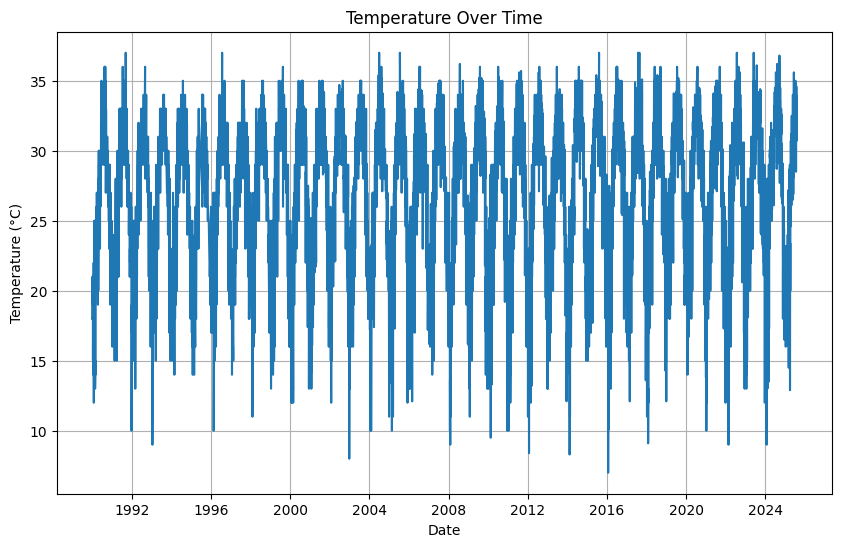

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='time', y='tmax')  # Adjust columns as needed
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

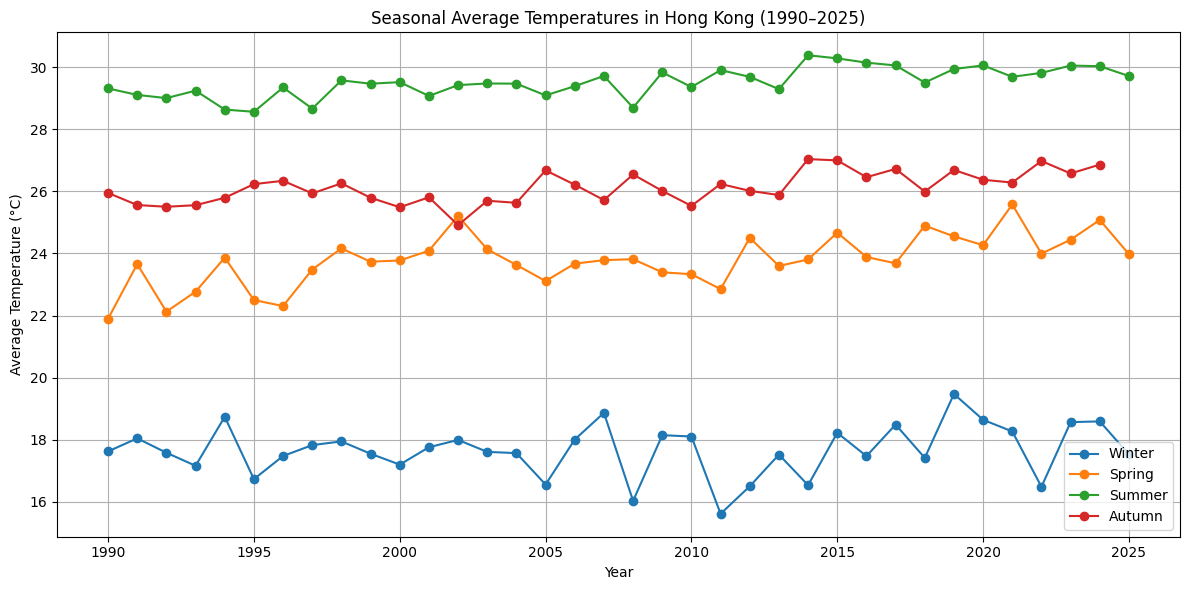

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame with datetime index and 'tavg' (average temp)
# Add a 'season' column as before
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df.index.month.map(month_to_season)
df['year'] = df.index.year

# Group by year and season and calculate mean temperature
seasonal_avg = df.groupby(['year', 'season'])['tavg'].mean().unstack()

# Plot the seasonal changes
plt.figure(figsize=(12, 6))
for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    if season in seasonal_avg.columns:
        plt.plot(seasonal_avg.index, seasonal_avg[season], marker='o', label=season)

plt.title('Seasonal Average Temperatures in Hong Kong (1990–2025)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

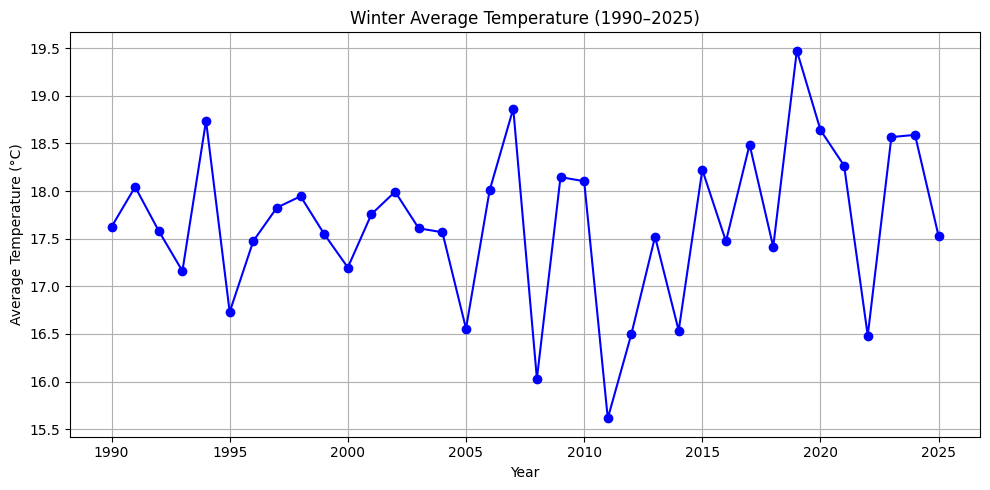

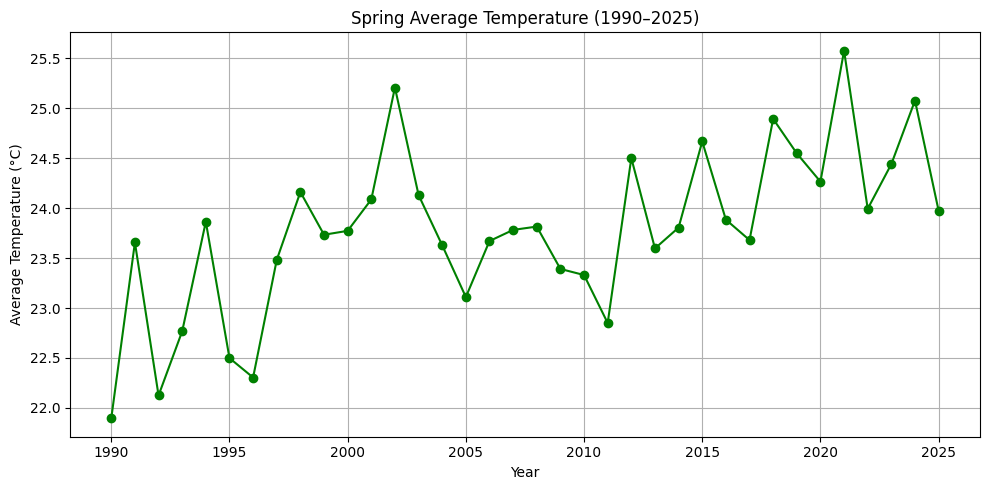

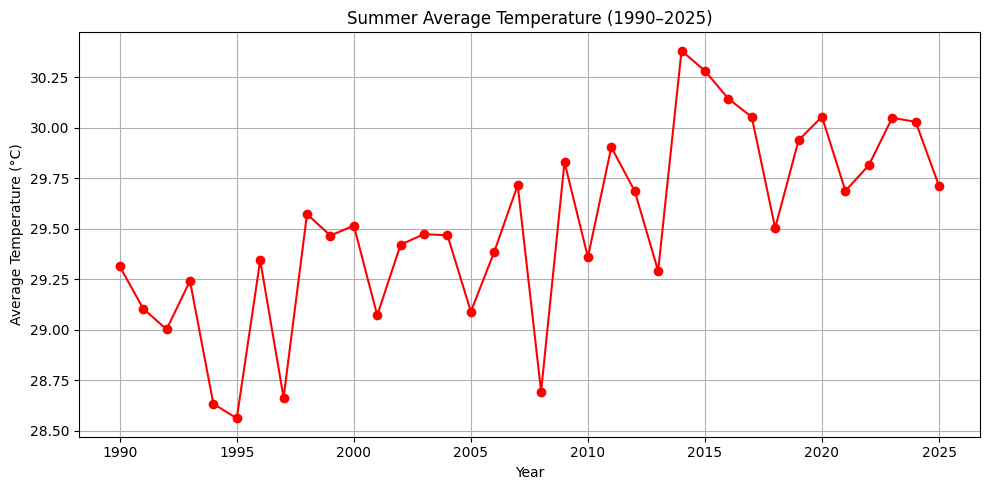

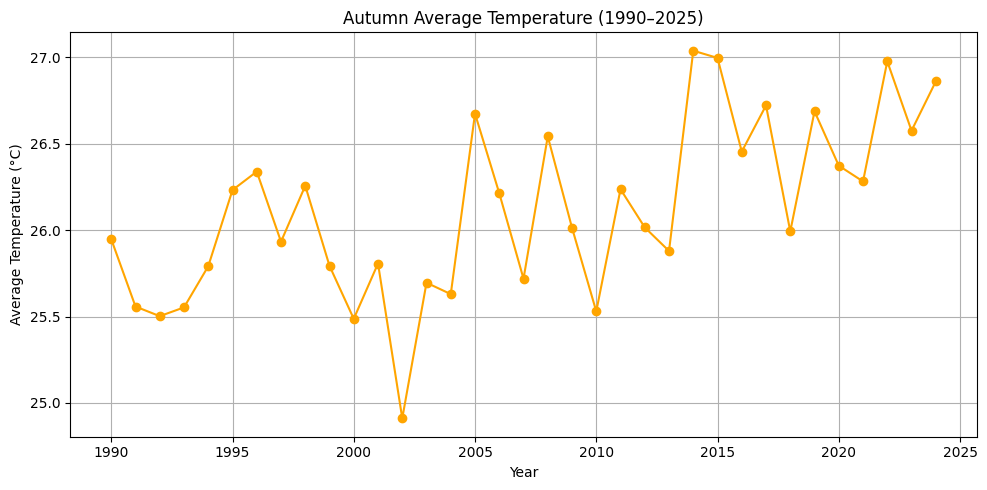

In [ ]:
import matplotlib.pyplot as plt

seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'red', 'Autumn': 'orange'}

for season in seasons:
    if season in seasonal_avg.columns:
        plt.figure(figsize=(10, 5))
        plt.plot(seasonal_avg.index, seasonal_avg[season], marker='o', color=colors[season])
        plt.title(f'{season} Average Temperature (1990–2025)')
        plt.xlabel('Year')
        plt.ylabel('Average Temperature (°C)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

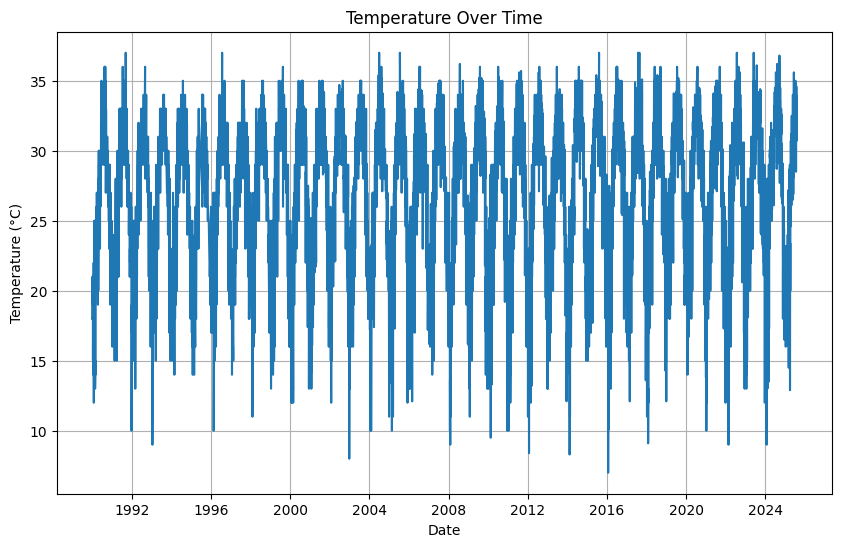

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='time', y='tmax')  # Adjust columns as needed
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

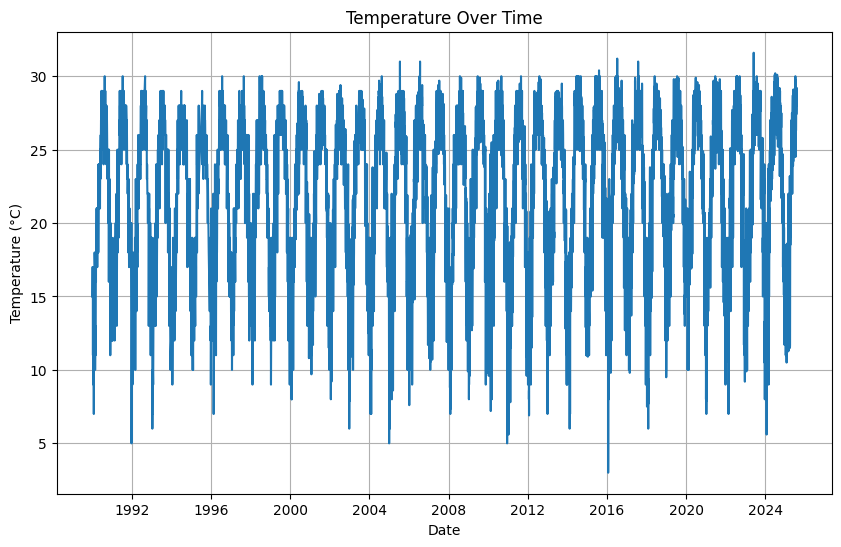

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='time', y='tmin')  # Adjust columns as needed
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

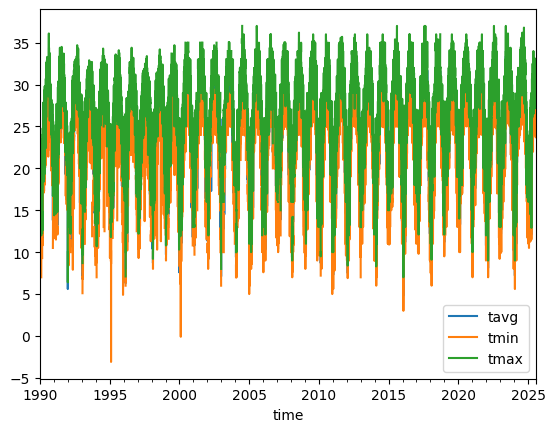

In [ ]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(1990, 1, 1)
end = datetime(2025, 8, 1)

# Create Point Hong Kongg
hongkong = Point(22.3, 114.1667)

# Get daily data for 1990
data = Daily(hongkong, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()